In [12]:
pip install gdown

In [13]:
!pip install --upgrade --no-cache-dir gdown


In [14]:
import gdown
import pandas as pd
import matplotlib as plt
from datetime import datetime,timedelta

In [23]:
fids = [
        ['miso1_7204.csv','1Ed_hVyoCpOfMBKah99OykvotFGY20xkb'],
        ['miso2_7203.csv','1emf1aag02iQtsgZSPQ1xswe2sN-tc9pp'],
        ['miso3_7205.csv','1zuhoGFK-sd_0uHyIz4XuWR22xBAW106S'],
]

for fid in fids:
    !gdown --id {fid[1]}
    #gdown.download(f"https://drive.google.com/uc?id={fid[1]}",fid[0],quiet=False) 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Ed_hVyoCpOfMBKah99OykvotFGY20xkb
To: /content/miso1_7204.csv
100% 139M/139M [00:00<00:00, 270MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1emf1aag02iQtsgZSPQ1xswe2sN-tc9pp
To: /content/miso2_7203.csv
100% 130M/130M [00:00<00:00, 233MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: htt

In [24]:
datenum = lambda dt: (dt-datetime(1900,1,1)).days+693962

def datenum(dt):
    td = (dt-datetime(1900,1,1))
    return td.days+td.seconds/86400+1e-6*td.microseconds/86400+693962

def txt2dt(txt):
    try:
        dt = datetime.strptime(txt,"%m/%d/%Y %H:%M:%S.%f")
    except:
        dt = datetime.strptime(txt,"%m/%d/%Y %H:%M:%S")

    return dt

In [58]:
df = pd.read_csv('miso1_7204.csv',skiprows=11)
df

,Date,Time,Temperature
0,07/09/2019,01:00:00,29.7570
1,07/09/2019,01:00:00.5,29.7587
2,07/09/2019,01:00:01,29.7586
3,07/09/2019,01:00:01.5,29.7603
4,07/09/2019,01:00:02,29.7622
...,...,...,...
3867476,07/31/2019,10:08:58,26.1098
3867477,07/31/2019,10:08:58.5,26.1121
3867478,07/31/2019,10:08:59,26.1145
3867479,07/31/2019,10:09:10,26.1719


In [70]:
df = pd.read_csv('miso1_7204.csv',skiprows=11)
df['Date'] = df.Date+' '+df.Time
df.drop('Time',inplace=True,axis=1)
df['Date'] = df.Date.apply(txt2dt)
df.set_index('Date',inplace=True,drop=True)
df

,Temperature
Date,
2019-07-09 01:00:00.000,29.7570
2019-07-09 01:00:00.500,29.7587
2019-07-09 01:00:01.000,29.7586
2019-07-09 01:00:01.500,29.7603
2019-07-09 01:00:02.000,29.7622
...,...
2019-07-31 10:08:58.000,26.1098
2019-07-31 10:08:58.500,26.1121
2019-07-31 10:08:59.000,26.1145


In [ ]:
df.Date[2]

Timestamp('2019-07-10 10:45:01')

In [71]:
#.to_netcdf('mydata.nc')
ds = df.to_xarray()
ds

<xarray.Dataset>
Dimensions:      (Date: 3867481)
Coordinates:
  * Date         (Date) datetime64[ns] 2019-07-09T01:00:00 ... 2019-07-31T10:...
Data variables:
    Temperature  (Date) float64 29.76 29.76 29.76 29.76 ... 26.11 26.17 26.17

In [ ]:
ds.to_netcdf(path='sample.nc',mode='w')

In [67]:
ds.Temperature.differentiate('Date',datetime_unit='h')

<xarray.DataArray 'Temperature' (Date: 3622580)>
array([ 6.48, 19.8 , 24.84, ..., 19.8 , 21.96, 21.6 ])
Coordinates:
  * Date     (Date) datetime64[ns] 2019-07-10T10:45:00 ... 2019-07-31T09:53:0...

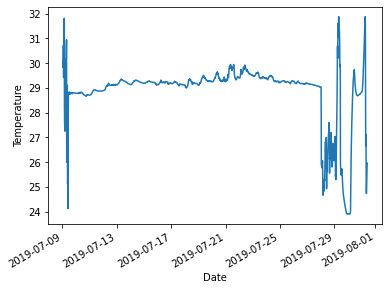

In [72]:
ds1=ds.resample(Date='15Min').mean(dim='Date')
ds1.Temperature.plot()

In [73]:
ds1.to_netcdf(path='D1.nc',mode='w')